In [19]:
from collections import *
import re
import csv
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from matplotlib import pyplot as plt
import time

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhijuncai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def better_tokenize(s):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U0001F1F2-\U0001F1F4"  
        u"\U0001F1E6-\U0001F1FF"  
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    c = emoji_pattern.sub(r'',s)
    c = re.sub(r'https?:\/\/[a-zA-Z0-9-_]+\.[a-zA-Z]+\/?([a-zA-Z0-9-_]+)?','',c)
    c = re.sub(r'@+','a',c)
    c = c.lower()
    c = re.sub('[^A-Za-z0-9\s]+','', c)
    c = re.sub(r'[0-9]+','',c)
    c = c.split()
    stop_words = set(stopwords.words('english'))
    for w in c:
        if w in stop_words:
            c.remove(w)
    return c


In [3]:
def tokenize(s):
    return s.split()

In [4]:
def openfile(fname):
    data = []
    f = open(fname, 'r')
    for l in f.readlines():
        data.append(better_tokenize(l))
    return data

In [5]:
data = []
f = open('X_train.txt', 'r')
for l in f.readlines():
    data.extend(better_tokenize(l))

In [6]:
w_freq = Counter(data)
xtrain = openfile('X_train.txt')
len(xtrain)
shape = (len(xtrain),len(w_freq))
shape

m = np.zeros(shape)

In [7]:
w_freq

Counter({'many': 96,
         'glasses': 8,
         'water': 23,
         'you': 1464,
         'drink': 32,
         'day': 192,
         'oh': 314,
         'yeah': 297,
         'loving': 13,
         'nikki': 7,
         'poor': 36,
         'shes': 60,
         'emo': 98,
         'yes': 287,
         'the': 1615,
         'time': 318,
         'do': 411,
         'people': 358,
         'think': 428,
         'swaying': 1,
         'arm': 7,
         'back': 189,
         'forth': 2,
         'would': 563,
         'change': 56,
         'direction': 2,
         'a': 1415,
         'bowling': 3,
         'ball': 3,
         'damn': 1415,
         'kenny': 3,
         'u': 592,
         'need': 209,
         'emotional': 3,
         'condoms': 2,
         'shit': 210,
         'son': 44,
         'pretty': 145,
         'much': 267,
         'now': 90,
         'will': 113,
         'less': 33,
         'aim': 14,
         'errors': 3,
         'weeeee': 3,
         'can': 192,
 

In [9]:
def get_x(x):
    
    n = 0
    dic = {}
    shape = (len(x),len(w_freq))


    m = np.zeros(shape)
    dic.update(w_freq)
    for key in w_freq:
        dic[key] = n
        n+=1

    for i in range(len(x)):
        for word in x[i]:
            if word in dic:
                m[i][dic[word]]+=1
    return m

In [10]:
x = get_x(xtrain)

In [11]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [12]:
def log_likelihood(y,B,x):
    y = np.asarray(y).T
    m = x.dot(B)
    ll = np.sum(y * m - np.log(1+np.exp(m)))
    return ll

In [13]:
def compute_gradient(x,y,yhat):
    e = y -yhat
    dll = (x.T).dot(e)
    return dll

In [14]:
def logistic_regression(x,y,learning_rate,num_step):
    beta = np.zeros(x.shape[1])
    llst = []

    for i in range(num_step):
        z = x.dot(beta)
        px = sigmoid(z)
        g = compute_gradient(x,y,px)
        beta += learning_rate * g
        ll = log_likelihood(y,beta,x)
        llst.append(ll)
        

    return beta, llst
        

In [15]:
def predict(x,b):
    z = x.dot(b)
    p = sigmoid(z)
    cls = np.round(p)
    return cls

In [16]:
Y = open('y_train.txt','r')
Y = [int(x) for x in Y.readlines()]


In [21]:
starttime = time.time()
b,ll = logistic_regression(x,Y,5e-5,1000)
endtime = time.time()

endtime-starttime

176.66593480110168

In [153]:
a = [x for x in range(0,1000)]

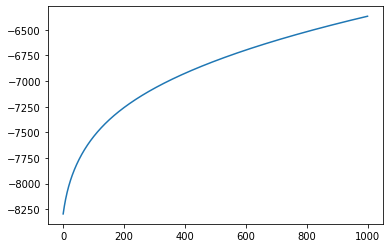

In [154]:
fig = plt.plot(a,ll)

In [155]:
cls = predict(x,beta).tolist()
ypred = [int(x) for x in cls]
b

array([-0.61003652, -0.12952015, -0.09633074, ..., -0.01154051,
       -0.01154051, -0.01154051])

In [ ]:
b

In [20]:

xdev = openfile('X_dev.txt')
xdevm = get_x(xdev)
ypred = predict(xdevm,b).tolist()
ypred = [int(x) for x in ypred]
ydev = open('y_dev.txt','r')
ydev = [int(x) for x in ydev.readlines()]


NameError: name 'b' is not defined

In [184]:
xdevm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [171]:
sklearn.metrics.f1_score(ydev,ypred)

0.7171215880893301

In [185]:
b_sml,ll_sml = logistic_regression(x,Y,5e-10,1000)

In [197]:
b_lrg,ll_lrg = logistic_regression(x,Y,0.0001,1000)

(-9000, -6000)

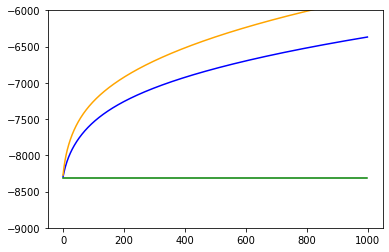

In [200]:
plt.plot(a,ll,color = 'blue')
plt.plot(a,ll_sml,color = 'green')
plt.plot(a,ll_lrg,color = 'orange')
plt.ylim(-9000,-6000)


In [22]:
starttime = time.time()
beta1,ll1 = logistic_regression(x,Y,0.01,100000)
endtime = time.time()

endtime-starttime

16575.225284814835

In [25]:
f = openfile('X_test.txt')
xtest = get_x(f)


with open('LRresult.csv', 'w', newline = '') as LR :
    i = 0
    writer = csv.writer(LR)
    writer.writerow(["Id", "Category"])
    pred = predict(xtest,beta1).tolist()
    ypred = [int(x) for x in pred]
    for i in range(len(ypred)):
        writer.writerow([i,ypred[i]])
        i+=1
LR.close()

In [24]:
beta1

array([-6.11586963, -8.61706486, -4.92405743, ..., -2.57944103,
       -2.57944103, -2.57944103])